In [2]:
import numpy as np 
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers,callbacks
from keras.utils import to_categorical
import numpy as np
import pandas as pd
train_data=pd.read_csv("train.csv")


X_train, X_val = train_test_split(train_data, test_size=0.2, random_state=18)

In [4]:

X=X_train.drop("emotions",axis=1)
Y=X_train["emotions"]
X_valid=X_val.drop("emotions",axis=1)
Y_valid=X_val["emotions"]

In [5]:
model = keras.Sequential([
    layers.Reshape((48, 48, 1), input_shape=(2304,)),
    
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(7, activation='linear'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
model.summary()


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 48, 48, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 batch_normalization_1 (Bat  (None, 33856)           

Epoch 1/50


180/180 [==============================] - 50s 262ms/step - loss: 2.7729 - accuracy: 0.2982 - val_loss: 1.6134 - val_accuracy: 0.3866
Epoch 2/50
180/180 [==============================] - 48s 264ms/step - loss: 1.5470 - accuracy: 0.4058 - val_loss: 1.5597 - val_accuracy: 0.4100
Epoch 3/50
180/180 [==============================] - 47s 264ms/step - loss: 1.4118 - accuracy: 0.4547 - val_loss: 1.6687 - val_accuracy: 0.4063
Epoch 4/50
180/180 [==============================] - 46s 256ms/step - loss: 1.3048 - accuracy: 0.4966 - val_loss: 1.6216 - val_accuracy: 0.4237
Epoch 5/50
180/180 [==============================] - 43s 241ms/step - loss: 1.2195 - accuracy: 0.5304 - val_loss: 1.6892 - val_accuracy: 0.4444
Epoch 6/50
180/180 [==============================] - 42s 232ms/step - loss: 1.1400 - accuracy: 0.5593 - val_loss: 1.7374 - val_accuracy: 0.4444
Epoch 7/50
180/180 [==============================] - 41s 230ms/step - loss: 1.0641 - accuracy: 0.5893 - val_loss: 1.7918 - val_

<Axes: >

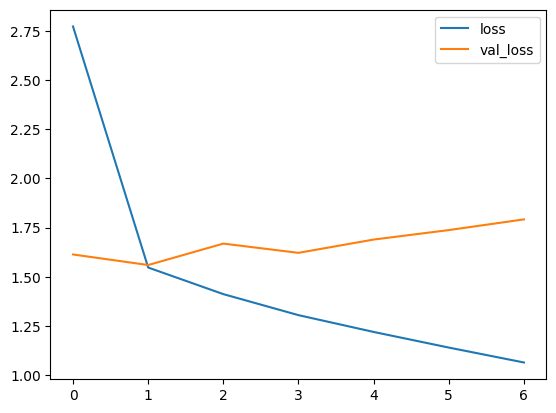

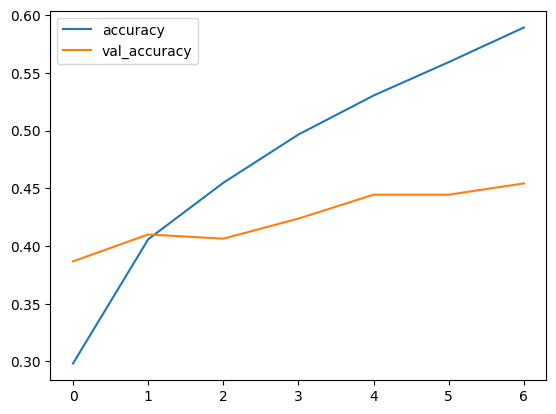

In [6]:
history = model.fit(X, Y, validation_data=(X_valid, Y_valid), batch_size=128,epochs=50,callbacks=[early_stopping])
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()